In [1]:
import pandas as pd
from tqdm import trange
from tqdm import tqdm
import tweepy
import pickle
import networkx as nx 

In [11]:
df_congress_tweets = pd.read_pickle('../Data/Processed/congress_cleaned_processed.pkl')
df_congress_tweets.shape

(1650398, 10)

In [12]:
# Getting handles
medias = pd.read_table('../Data/Raw/LargestMedia.csv', sep=';')
twitter_handles = pd.read_table('../Data/Processed/Twitter_Handles_updated.csv', sep = ',')

In [13]:
medias['State'] = None
medias['Party'] = None
medias['Type'] = 'Media'
medias.rename(columns={'Twitter name': 'Twitter', 'Media': 'Name'}, inplace=True)

In [14]:
Data_Full = pd.concat([twitter_handles, medias])

In [15]:
Data_Full

Twitter State       Party            Type                     Name  \
0        JeffFlake    AZ  Republican         Senator               Jeff Flake   
1        SenJonKyl    AZ  Republican         Senator                  Jon Kyl   
2   reppeteaguilar    CA    Democrat  Representative            Peter Aguilar   
3      repcardenas    CA    Democrat  Representative            Tony Cardenas   
4      DarrellIssa    CA  Republican  Representative             Darrell Issa   
..             ...   ...         ...             ...                      ...   
11         thehill  None        None           Media                 The Hill   
12        politico  None        None           Media                 POLITICO   
13             WSJ  None        None           Media  The Wall Street Journal   
14    TheEconomist  None        None           Media            The Economist   
15        HuffPost  None        None           Media                 HuffPost   

       twitter_display_name  
0                Jeff Flake  
1      U.S. Senator Jon Kyl  
2         Rep. Pete Aguilar  
3        Rep. Tony Cárdenas  
4              Darrell Issa  
..                      ...  
11                 The Hill  
12                 POLITICO  
13  The Wall Street Journal  
14            The Economist  
15                 HuffPost  

[634 rows x 6 columns]

In [21]:
df_retweets = df_congress_tweets[df_congress_tweets['retweet'].isin(Data_Full.Twitter)]
df_retweets.head()

user_id             user_name                  id          created_at  \
41    13218102   Senator John Cornyn  824779864175702016 2017-01-27 00:43:37   
165  137794015       Rep. Ted Deutch  824961188190629891 2017-01-27 12:44:08   
193   76649729  Sen. Lamar Alexander  824973693587771392 2017-01-27 13:33:50   
194   76649729  Sen. Lamar Alexander  824973693587771392 2017-01-27 13:33:50   
244   55677432    Bill Cassidy, M.D.  824986328156749825 2017-01-27 14:24:02   

                                                  text       retweet  \
41   miami dade mayor ends sanctuary status orders ...       FoxNews   
165  when you simply dont respect the united states...  RepTedDeutch   
193  @betsydevos is the person we need for this job...   SenatorBurr   
194  @betsydevos is the person we need for this job...   SenatorBurr   
244  from @politico devos vows to enforce special e...  SenAlexander   

     retweet_count  favorite_count  in_reply_to_status_id  in_reply_to_user_id  
41             863               0                    NaN                  NaN  
165             46               0                    NaN                  NaN  
193            177               0                    NaN                  NaN  
194            176               0                    NaN                  NaN  
244              4               0                    NaN                  NaN

In [22]:
df_retweets_ajd = pd.DataFrame(data = 0, index = Data_Full['Name'], columns = Data_Full['Name'])

In [24]:
for idx, retweet in tqdm(df_retweets.iterrows(), total=len(df_retweets)):
    
    retweeter = retweet['user_name']
    original_poster = retweet['retweet'] 

    retweeter_name = Data_Full[Data_Full['twitter_display_name'] == retweeter]['Name'].values[0]
    original_poster_name = Data_Full[Data_Full['Twitter'] == original_poster]['Name'].values[0]

    df_retweets_ajd.loc[retweeter_name, original_poster_name] += 1

100%|██████████| 72984/72984 [01:35<00:00, 764.45it/s]


In [27]:
df_retweets_ajd

Name                     Jeff Flake  Jon Kyl  Peter Aguilar  Tony Cardenas  \
Name                                                                         
Jeff Flake                        0        0              0              0   
Jon Kyl                           0        0              0              0   
Peter Aguilar                     0        0              0              0   
Tony Cardenas                     0        0              0              0   
Darrell Issa                      0        0              0              0   
...                             ...      ...            ...            ...   
The Hill                          0        0              0              0   
POLITICO                          0        0              0              0   
The Wall Street Journal           0        0              0              0   
The Economist                     0        0              0              0   
HuffPost                          0        0              0              0   

Name                     Darrell Issa  Steve Knight  Dana Rohrabacher  \
Name                                                                    
Jeff Flake                          0             0                 0   
Jon Kyl                             0             0                 0   
Peter Aguilar                       0             0                 0   
Tony Cardenas                       0             0                 0   
Darrell Issa                        0             0                 0   
...                               ...           ...               ...   
The Hill                            0             0                 0   
POLITICO                            0             0                 0   
The Wall Street Journal             0             0                 0   
The Economist                       0             0                 0   
HuffPost                            0             0                 0   

Name                     Ed Royce  David Valadao  Mike Coffman  ...  \
Name                                                            ...   
Jeff Flake                      0              0             0  ...   
Jon Kyl                         0              0             0  ...   
Peter Aguilar                   0              0             0  ...   
Tony Cardenas                   0              0             0  ...   
Darrell Issa                    0              0             0  ...   
...                           ...            ...           ...  ...   
The Hill                        0              0             0  ...   
POLITICO                        0              0             0  ...   
The Wall Street Journal         0              0             0  ...   
The Economist                   0              0             0  ...   
HuffPost                        0              0             0  ...   

Name                     Bloomberg  The New York Times  USA Today Politics  \
Name                                                                         
Jeff Flake                       0                   0                   0   
Jon Kyl                          0                   0                   0   
Peter Aguilar                    0                   0                   0   
Tony Cardenas                    0                   1                   0   
Darrell Issa                     0                   0                   0   
...                            ...                 ...                 ...   
The Hill                         0                   0                   0   
POLITICO                         0                   0                   0   
The Wall Street Journal          0                   0                   0   
The Economist                    0                   0                   0   
HuffPost                         0                   0                   0   

Name                     Breitbart News  TIME  The Hill  POLITICO  \
Name                       

In [31]:
# Create graph
G = nx.from_numpy_matrix(df_retweets_ajd.values, create_using=nx.DiGraph())

# Because we use numpy, labels need to be reset
label_mapping = {idx: val for idx, val in enumerate(df_retweets.columns)}
G = nx.relabel_nodes(G, label_mapping)

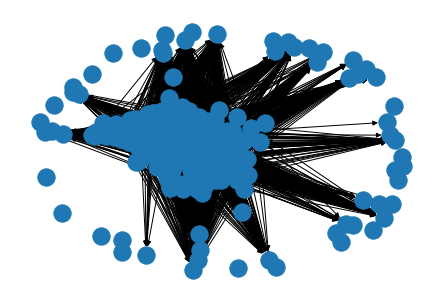

In [33]:

nx.draw(G)